In [1]:
import tensorflow as  tf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
! pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import sys
!{sys.executable} -m pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install matplotlib-inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from d2l import tensorflow as d2l

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
y_train1 = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test1 = tf.keras.utils.to_categorical(y_test, num_classes=10)

1. Design a CNN with:
a) One Convolution layer which uses 32 kernels each of size 5x5, stride = 1 and, padding =0
b) One Pooling layer which uses MAXPOOLING with stride =2.
c) One hidden layer having number of neurons = 100

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='ReLU', input_shape=(28,28,1),strides=1,padding="same"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(units=100, activation='tanh'))
model.add(Dense(units=10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 629,142
Trainable params: 629,142
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 79s 41ms/step - loss: 0.1617 - accuracy: 0.9512 - val_loss: 0.0657 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0513 - val_accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0348 - accuracy: 0.9891 - val_loss: 0.0451 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0241 - accuracy: 0.9926 - val_loss: 0.0411 - val_accuracy: 0.9878
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0152 - accuracy: 0.9959 - val_loss: 0.0451 - val_accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.0439 - val_accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 76s 41ms/step - loss: 0.0082 - accuracy: 0.9977 - val_loss: 0.0453 -

In [ ]:
predictions = model.predict(x_test)
print(np.argmax(predictions[87]))

313/313 [==============================] - 3s 10ms/step
3


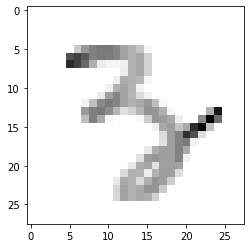

In [ ]:
plt.imshow(x_test[87],cmap=plt.cm.binary)
plt.show()

In [ ]:
print(x_train.shape)
print(y_train1.shape)
print(x_test.shape)
print(y_test1.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
test_loss, test_acc= model.evaluate(x_test,y_test,verbose=2)

313/313 - 3s - loss: 0.0561 - accuracy: 0.9858 - 3s/epoch - 9ms/step


2. Design a CNN with:
a) Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride = 1 and, padding =0
b) One Pooling layer which uses MAXPOOLING with stride =2.
c) One hidden layer having number of neurons = 100
Note: use ReLU activation function after each convolution layer.

In [10]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='ReLU', input_shape=(28,28,1),strides=1,padding="same"))
model2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='ReLU',strides=1,padding="same"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(units=100, activation='tanh'))
model2.add(Dense(units=10, activation = 'softmax'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
                                                                 
 dense_4 (Dense)             (None, 100)               627300    
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [11]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model2.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 5ms/step - loss: 0.4338 - accuracy: 0.8765 - val_loss: 0.1785 - val_accuracy: 0.9485
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1865 - accuracy: 0.9434 - val_loss: 0.1560 - val_accuracy: 0.9524
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1551 - accuracy: 0.9518 - val_loss: 0.1351 - val_accuracy: 0.9582
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1539 - accuracy: 0.9531 - val_loss: 0.1384 - val_accuracy: 0.9567
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1431 - accuracy: 0.9556 - val_loss: 0.1891 - val_accuracy: 0.9423
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1454 - accuracy: 0.9553 - val_loss: 0.1271 - val_accuracy: 0.9621
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1346 - accuracy: 0.9581 - val_loss: 0.1246 - val_accurac

In [14]:
predictions2 = model2.predict(x_test)
print(np.argmax(predictions2[87]))

313/313 [==============================] - 1s 2ms/step
3


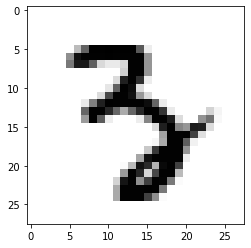

In [15]:
plt.imshow(x_test[87],cmap=plt.cm.binary)
plt.show()

In [16]:
test_loss, test_acc= model2.evaluate(x_test,y_test,verbose=2)

313/313 - 1s - loss: 0.1352 - accuracy: 0.9579 - 1s/epoch - 3ms/step


In [ ]:
from keras.layers import AveragePooling2D

lenet = Sequential()
lenet.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(28,28,1)))
lenet.add(AveragePooling2D())
lenet.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
lenet.add(AveragePooling2D())
lenet.add(Flatten())
lenet.add(Dense(units=120, activation='sigmoid'))
lenet.add(Dense(units=84, activation='sigmoid'))
lenet.add(Dense(units=10, activation = 'softmax')) 
lenet.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 12, 12, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 120)             

In [ ]:
lenet.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
lenet.fit(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4106 - accuracy: 0.8852 - val_loss: 0.1368 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1131 - accuracy: 0.9662 - val_loss: 0.0856 - val_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.0740 - val_accuracy: 0.9771
Epoch 4/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0599 - accuracy: 0.9819 - val_loss: 0.0537 - val_accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0493 - accuracy: 0.9847 - val_loss: 0.0579 - val_accuracy: 0.9826
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0418 - accuracy: 0.9869 - val_loss: 0.0470 - val_accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0444 -

In [ ]:
predictions3 = lenet.predict(x_test)
print(np.argmax(predictions[87]))

313/313 [==============================] - 2s 8ms/step
3


In [ ]:
test_loss, test_acc= lenet.evaluate(x_test,y_test,verbose=2)

313/313 - 4s - loss: 0.0450 - accuracy: 0.9867 - 4s/epoch - 13ms/step


In [6]:
cifar = tf.keras.datasets.cifar10
(x_train1, y_train1),(x_test1, y_test1) = cifar.load_data()

In [11]:
from tensorflow.keras.utils import to_categorical

# Normalizing
x_train1=x_train1/255
x_test1=x_test1/255

#One hot encoding
y_train1=to_categorical(y_train1,10)
y_test1=to_categorical(y_test1,10)

In [50]:
y_train2 = y_train1.flatten()
y_test2 = y_test1.flatten()
y_train2 = tf.one_hot(y_train2.astype(np.int32), depth=10)
y_test2 = tf.one_hot(y_test2.astype(np.int32), depth=10)

In [51]:
x_train1 = x_train1.reshape(x_train1.shape[0], 32, 32, 3)
x_test1 = x_test1.reshape(x_test1.shape[0], 32, 32, 3)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(5, 5),input_shape=(32,32,3), activation='ReLU',strides=1,padding="same"))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(units=100, activation='ReLU'))
model4.add(Dense(units=10, activation = 'softmax'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               819300    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 822,742
Trainable params: 822,742
Non-trainable params: 0
________________________________________________

In [13]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
history1=model4.fit(x_train1,y_train1,epochs=10,validation_data=(x_test1,y_test1))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5489 - accuracy: 0.4517 - val_loss: 1.5362 - val_accuracy: 0.4558
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5357 - accuracy: 0.4569 - val_loss: 1.5344 - val_accuracy: 0.4560
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5219 - accuracy: 0.4610 - val_loss: 1.5087 - val_accuracy: 0.4665
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5102 - accuracy: 0.4642 - val_loss: 1.5090 - val_accuracy: 0.4650
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4994 - accuracy: 0.4684 - val_loss: 1.4870 - val_accuracy: 0.4770
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4879 - accuracy: 0.4740 - val_loss: 1.4951 - val_accuracy: 0.4736
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4766 - accuracy: 0.4779 - val_loss: 1.4782 - val_accuracy

In [16]:
test_loss, test_acc= model4.evaluate(x_test1,y_test1,verbose=2)

313/313 - 1s - loss: 1.5525 - accuracy: 0.4481 - 745ms/epoch - 2ms/step


In [84]:
cifar = tf.keras.datasets.cifar10
(x_train3, y_train3), (x_test3, y_test3) = cifar.load_data()

In [77]:
from os import name
from keras.layers.attention.multi_head_attention import activation

model6=tf.keras.models.Sequential()
model6.add(tf.keras.layers.Input(shape=(32,32,3)))
model6.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model6.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same"))
model6.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(100,activation="relu"))
model6.add(tf.keras.layers.Dense(10,name="OutputLayer",activation="softmax"))

model6.summary()


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 2048)              0         
                                                                 
 dense_35 (Dense)            (None, 100)             

In [78]:
model6.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics="accuracy")

In [88]:
history3=model6.fit(x_train3,y_train3,epochs=10,validation_data=(x_test3,y_test3))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3935 - accuracy: 0.1037 - val_loss: 1.3776 - val_accuracy: 0.1055
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1928 - accuracy: 0.1043 - val_loss: 1.2426 - val_accuracy: 0.0555
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0530 - accuracy: 0.0996 - val_loss: 1.1872 - val_accuracy: 0.0909
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9553 - accuracy: 0.1006 - val_loss: 1.1818 - val_accuracy: 0.0918
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8645 - accuracy: 0.1008 - val_loss: 1.1994 - val_accuracy: 0.0853
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7860 - accuracy: 0.1012 - val_loss: 1.1822 - val_accuracy: 0.0844
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7192 - accuracy: 0.1007 - val_loss: 1.2144 - val_accuracy:

In [89]:
test_loss, test_acc= model6.evaluate(x_test3,y_test3,verbose=2)

313/313 - 1s - loss: 1.3984 - accuracy: 0.1116 - 691ms/epoch - 2ms/step


<AxesSubplot:>

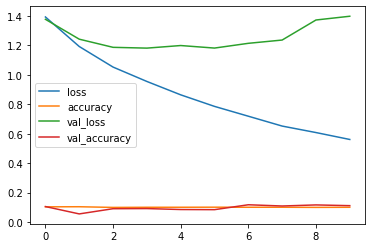

In [90]:
pd.DataFrame(history3.history).plot()


In [41]:
from keras.layers import AveragePooling2D

lenet2 = Sequential()
lenet2.add(Conv2D(filters=6, kernel_size=(5, 5), activation='tanh', input_shape=(32,32,3)))
lenet2.add(AveragePooling2D())
lenet2.add(Conv2D(filters=16, kernel_size=(5, 5), activation='tanh'))
lenet2.add(AveragePooling2D())
lenet2.add(Flatten())
lenet2.add(Dense(units=120, activation='sigmoid'))
lenet2.add(Dense(units=84, activation='sigmoid'))
lenet2.add(Dense(units=10, activation = 'softmax')) 
lenet2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_10 (Flatten)        (None, 400)               0         
                                                                 
 dense_21 (Dense)            (None, 120)             

In [42]:
lenet2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [43]:
history1=lenet2.fit(x_train1,y_train1,epochs=20,validation_data=(x_test1,y_test1))

Epoch 1/20
1563/1563 [==============================] - 13s 6ms/step - loss: 2.0751 - accuracy: 0.2365 - val_loss: 1.9397 - val_accuracy: 0.2907
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8643 - accuracy: 0.3261 - val_loss: 1.8438 - val_accuracy: 0.3375
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7469 - accuracy: 0.3713 - val_loss: 1.6857 - val_accuracy: 0.3881
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6605 - accuracy: 0.4018 - val_loss: 1.6169 - val_accuracy: 0.4165
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5996 - accuracy: 0.4238 - val_loss: 1.5747 - val_accuracy: 0.4365
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5494 - accuracy: 0.4425 - val_loss: 1.5274 - val_accuracy: 0.4502
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5074 - accuracy: 0.4586 - val_loss: 1.4909 - val_accuracy

In [45]:
test_loss, test_acc= lenet2.evaluate(x_test1,y_test1,verbose=2)

313/313 - 1s - loss: 1.3409 - accuracy: 0.5203 - 811ms/epoch - 3ms/step


<AxesSubplot:>

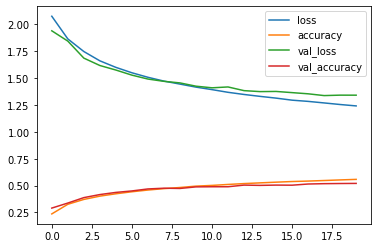

In [47]:
pd.DataFrame(history1.history).plot()


5. Modify the architectures/hyperparameters to improve to performance.

In [56]:
model6=Sequential()
model6.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.25)) # Drop 25% of the units from the layer.
model6.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(256,activation='relu'))
model6.add(Dense(10,activation='softmax'))

In [59]:
model6.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
history1=model6.fit(x_train1,y_train1,epochs=10,validation_data=(x_test1,y_test1))

Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accurac

In [61]:
test_loss, test_acc= model6.evaluate(x_test1,y_test1,verbose=2)

313/313 - 1s - loss: 2.3027 - accuracy: 0.1000 - 848ms/epoch - 3ms/step


<AxesSubplot:>

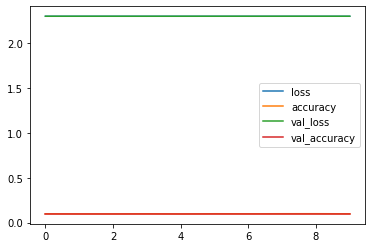

In [62]:
pd.DataFrame(history1.history).plot()
